In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import ticker
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('https://www.stsci.edu/~dcoe/matplotlibrc.txt')  # for others to use

In [2]:
import astropy.io.ascii

In [13]:
sens_table = astropy.io.ascii.read('nircam_imaging_sensitivity_etcv2.txt', format='commented_header', header_start=-1)
sens_table

filter,sensitivity,depth
str6,float64,float64
F070W,14.5,28.5
F090W,11.9,28.71
F115W,11.1,28.79
F150W,9.0,29.01
F200W,8.0,29.14
F277W,12.9,28.63
F322W2,8.3,29.1
F356W,12.0,28.7
F444W,16.1,28.38


In [14]:
sens_table_v1 = astropy.io.ascii.read('sensitivity_v1.txt', format='commented_header', header_start=-1)
sens_table_v1

filter,sensitivity,center,lambda1,lambda2
str6,float64,float64,float64,float64
F070W,22.5,0.695,0.6103,0.7797
F090W,15.3,0.8989,0.7931,1.0046
F115W,13.2,1.1457,1.0102,1.2812
F150W,10.6,1.5002,1.3313,1.669
F200W,9.1,1.9909,1.7544,2.2274
F277W,14.3,2.7834,2.4311,3.1356
F322W2,9.1,3.2262,2.4342,4.0182
F356W,12.1,3.5544,3.1379,3.9709
F444W,23.6,4.4343,3.8833,4.9943


In [38]:
import numpy as np
import astropy.units as u

def fmtexp(x, pos):
    if 1e-4 < x < 1e4:
        s = '%g' % x
    else:
        p = int(np.log10(x))
        d = int(np.round(x / 10**p))
        #print d
        s = ''
        if d > 1:
            s += '%d$\\times$' % d
    
        s += '10${\\mathdefault{^{%d}}}$' % p
    return s

def mapfmtd(x):
    return '%d' % x

def mapfmt1(x):
    return '%.1f' % x

def interp_log(x, xdata, ydata, silent=0, extrap=0):
    return 10 ** np.interp(np.log10(x), np.log10(xdata), np.log10(ydata))


def nJytoAB(F_nJy):  # using Astropy units
    return (F_nJy * u.nJy).to(u.ABmag).value

def ABtonJy(mAB):
    return 10 ** (-0.4 * (mAB - 31.4))

def multiples(lo, hi=None, x=1, eps=1e-7):
    """Returns an array of the multiples of x between [lo,hi] inclusive"""
    if hi == None:
        hi = lo
        lo = 1
    eps = eps * np.sign(x)
    l = np.ceil((lo-eps)/x)*x
    a = np.arange(l, hi+eps, x)
    if np.sum(abs(a - a.astype(int))) == 0:
        a = a.astype(int)
    return a

In [44]:
import matplotlib as mpl
#mpl.rcParams['axes.titlesize'] = 22
#mpl.rcParams['axes.labelsize']   = 18
#mpl.rcParams['figure.labelsize'] = 18
mpl.rcParams['xtick.labelsize']  = 18
mpl.rcParams['ytick.labelsize']  = 18
#mpl.rcParams['legend.fontsize']  = 14
#mpl.rcParams['xtick.direction']  = 'in'
#mpl.rcParams['ytick.direction']  = 'in'

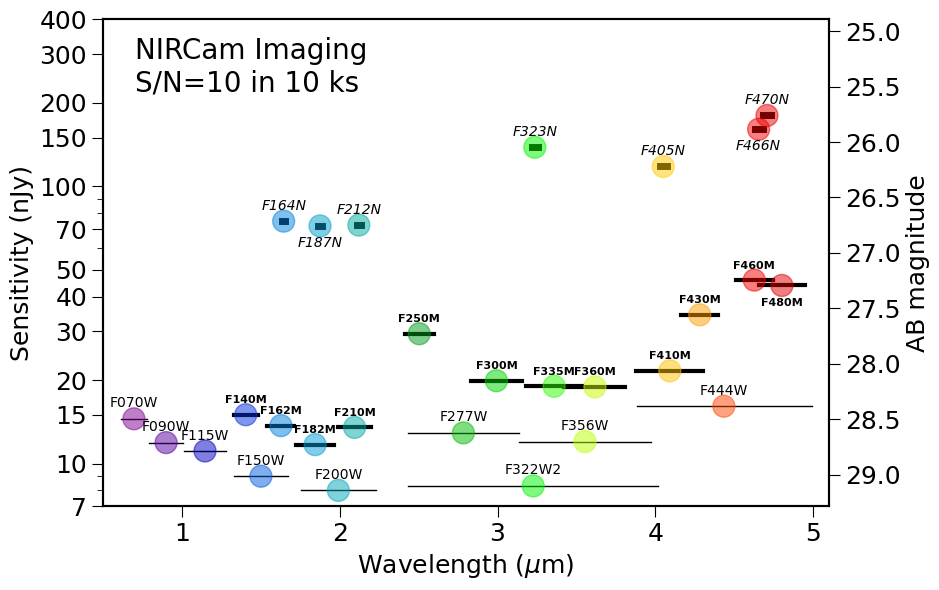

In [53]:
fig, ax = plt.subplots(figsize=(9.5,6))

ss = []
cc = []
for i in range(len(sens_table)):
    filter = sens_table['filter'][i]
    sensitivity = sens_table['sensitivity'][i]
    lam = sens_table_v1['center'][i]
    lam1 = sens_table_v1['lambda1'][i]
    lam2 = sens_table_v1['lambda2'][i]
    if 'W' in filter:
        sym = 'D'
        lw = 1
        color = 'w'
        ms = 12
        fontweight = 'normal'
        fontsize = 10
        color = 'k'
        style = 'normal'
    elif 'M' in filter:
        sym = 'o'
        lw = 3
        color = 'k'
        ms = 8
        fontweight = 'bold'
        fontsize = 8
        color = 'k'
        style = 'normal'
        #continue
    elif 'N' in filter:
        sym = '+'
        lw = 5
        color = 'k'
        ms = 8
        fontweight = 'normal'
        fontsize = 10
        color= 'k'
        style = 'italic'
        #continue
    
    dy = 0.9
    dy = 1.5
    y = float(sensitivity)
    yfac = 1.1
    if filter in 'F187N F466N F480M'.split():
        yfac = 0.84  # label below point
    plt.text(lam, y*yfac, filter, ha='center', fontsize=fontsize, fontweight=fontweight, color=color, style=style)
    #s = roundint(float(sensitivity))
    #text(center, float(sensitivity)-1, '%d'%s, ha='center', va='top', fontsize=10)

    plt.plot([lam1, lam2], [sensitivity, sensitivity], 'k', lw=lw, zorder=-10)
    #plot([center], [sensitivity], color+sym, ms=ms)
    ss.append(float(sensitivity))
    cc.append(float(lam))

cmap = 'nipy_spectral'
plt.scatter(cc, ss, c=cc, s=250, alpha=0.5, cmap=cmap, vmin=0.3, vmax=5.3)

ylo, yhi = 7, 400
plt.ylim(ylo, yhi)

xlo, xhi = 0.5, 5.1
plt.xlim(xlo, xhi)

#xlabel('Wavelength (microns)')
plt.xlabel('Wavelength ($\mu$m)')
#ylabel('Sensitivity  (10-sigma in 10 ks)')
#ylabel('Sensitivity  (10$\sigma$ in 10 ks)')
#ylabel('Sensitivity (nJy)  S/N=10 in 10 ks')
#plt.ylabel('Limiting Sensitivity (nJy)')
plt.ylabel('Sensitivity (nJy)')

#plt.text(0.7, 270, 'S/N=10 in 10 ks', fontsize=20)
plt.text(0.7, 220, 'NIRCam Imaging\nS/N=10 in 10 ks', fontsize=20)

plt.semilogy()

#retickylogmult((1,1.5,2,3,4,5,7))
d = 1,1.5,2,3,4,5,7
ax.yaxis.set_major_formatter(fmtexp)
ax.yaxis.set_major_locator(ticker.LogLocator(10, d))

ytxf = plt.yticks()[0]
ytxm = list(map(nJytoAB, ytxf))
ytxm = ytxm[1:]
dy = 0.5
ytxm = multiples(min(ytxm), max(ytxm)+dy, dy)
ytxf = list(map(ABtonJy, ytxm))

#ax1 = gca()
ax2 = ax.twinx()
ax.yaxis.set_label_position('left')
ax2.yaxis.set_label_position('right')
ax.yaxis.tick_left()
ax2.yaxis.tick_right()

plt.semilogy()

#print ytxf
plt.ylabel('AB magnitude')
yts = map(mapfmt1, ytxm)
#print yts
plt.yticks(ytxf, yts)
plt.ylim(ylo, yhi)
ax2.minorticks_off()
plt.xlim(xlo, xhi)

plt.savefig('NIRCam_imaging_sensitivity_ETCv2.pdf')
